##### Copyright 2025 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Use Gemini thinking

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

[Gemini 2.5 Flash](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-flash-preview-04-17), [Gemini 2.5 Pro](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-pro-preview-03-25) and [Gemini Flash 2.0 Thinking]() are models that are
trained to do a [thinking process](https://ai.google.dev/gemini-api/docs/thinking-mode) (or reasoning) before getting to a final answer. As a result,
those models are capable of stronger reasoning capabilities in its responses than previous models.

You'll see examples of those reasoning capabilities with [code understanding](#scrollTo=GAa7sCD7tuMW), [geometry](#scrollTo=ADiJV-fFyjRe) and [math](#scrollTo=EXPPWpt6ttJZ) problems.

As you will see, the model is exposing its thoughts so you can have a look at its reasoning and how it did reach its conclusions.

## 0/ Setup

This section install the SDK, set it up using your [API key](../quickstarts/Authentication.ipynb), imports the relevant libs, downloads the sample videos and upload them to Gemini.

Just collapse (click on the little arrow on the left of the title) and run this section if you want to jump straight to the examples (just don't forget to run it otherwise nothing will work).

### Install SDK

The new **[Google Gen AI SDK](https://ai.google.dev/gemini-api/docs/sdks)** provides programmatic access to Gemini models using both the [Google AI for Developers](https://ai.google.dev/gemini-api/docs) and [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview) APIs. With a few exceptions, code that runs on one platform will run on both. This means that you can prototype an application using the Developer API and then migrate the application to Vertex AI without rewriting your code.

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks) or in the [Getting started](../quickstarts/Get_started.ipynb) notebook.

In [1]:
%pip install -U -q "google-genai>=1.10.0" # 1.10.0 is needed for thinking_budget

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.7/159.7 kB 3.5 MB/s eta 0:00:00


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [2]:
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK you now only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [3]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

In [4]:
MODEL_ID="gemini-2.5-flash-preview-04-17" # @param ["gemini-2.5-flash-preview-04-17", "gemini-2.5-pro-preview-03-25"] {"allow-input":true, isTemplate: true}

### Understanding the "thinking" models

[Gemini 2.5 models](https://ai.google.dev/gemini-api/docs/thinking-mode) are optimized for complex tasks that need multiple rounds of strategyzing and iteratively solving.

[Gemini 2.5 Flash](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-flash-preview-04-17) in particular, brings the flexibility of using `thinking_budget` - a parameter
that offers fine-grained control over the maximum number of tokens a model can generate while thinking. Alternatively, you can designate a precise token allowance for the
"thinking" stage through the adjusment of the `thinking_budget` parameter. This allowance can vary between 0 and 24576 tokens for 2.5 Flash.

For more information about all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini) for extended information on each of them.

**NOTE:** On this notebook all examples are using Gemini 2.5 Flash and the new `thinking_budget` parameter.
The `thinking_budget` parameter is not available for Gemini 2.5 Pro for now - If you want to use Gemini 2.5 Pro, you can remove the `thinking_budget` parameter from the code.

### Imports

In [5]:
import json
from PIL import Image
from IPython.display import display, Markdown

# 1/ Examples

Here are some quite complex examples of what Gemini 2.0 thinking model can solve.

In each of them you can select different models to see how this new model compares to its predecesors.

In some cases, you'll still get the good answer from the other models, in that case, re-run it a couple of times and you'll see that Gemini 2.0 thinking is more consistent thanks to its thinking step.

## Example #1: requests with thinking

You can start by asking the model to explain a concept and see how it does reasoning before answering.

Starting with the adaptive `thinking_budget` - which is the default when you don't specify a budget - the model will dynamically adjust the budget based on the complexity of the request.

In [30]:
prompt = """
    You are playing the 20 question game. You know that what you are looking for
    is a aquatic mammal that doesn't live in the sea, and that's smaller than a
    cat. What could that be and how could you make sure?
"""
# The animal I'm thinking of is a platipus

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

Markdown(response.text)

Okay, let's break this down based on the clues you've been given in your 20 Questions game!

**What could that be?**

Given the constraints:

1.  **Aquatic mammal:** Needs to live in water and be a mammal.
2.  **Doesn't live in the sea:** Rules out most whales, dolphins, seals, etc. It must be a freshwater or possibly brackish water creature.
3.  **Smaller than a cat:** Rules out large freshwater mammals like beavers, hippos, manatees, and larger otters.

The most likely and distinctive answer fitting *all* these criteria is:

*   **A Platypus:** It's a mammal, it's aquatic, it lives in freshwater (rivers and lakes in Australia), and an adult platypus is generally smaller than an average domestic cat (typically weighing 1.5 to 3.3 lbs, while cats are often 8-10+ lbs).

Another possibility, depending on the specific species and how strictly "smaller than a cat" is interpreted (some smaller cats are quite small), could be:

*   **A smaller species of freshwater otter:** While many otters are cat-sized or larger (like the North American River Otter), species like the Asian Small-clawed Otter are significantly smaller and could fit this description.

However, the Platypus is a very unique and common "answer" in 20 Questions that fits these specific clues perfectly.

**How could you make sure?**

Within the rules of 20 Questions (asking Yes/No questions), you would ask questions that narrow down to the specific unique features of the likely candidates.

Assuming your prime suspect is a Platypus, you'd ask questions like:

1.  **Confirm Freshwater:** "Does it live in rivers or lakes?" (Trying to confirm freshwater vs. ocean or brackish). *Expected answer for Platypus: Yes.*
2.  **Confirm Size (Proxy):** "Is it smaller than a breadbox?" or "Is it roughly the size of a large squirrel?" (Common ways to estimate size in 20 Questions). *Expected answer for Platypus: Yes.*
3.  **Ask about its Unique Features (Platypus specific):**
    *   "Does it lay eggs?" (Very unique for a mammal). *Expected answer for Platypus: Yes.*
    *   "Does it have a bill (like a duck)?" (Another very unique feature). *Expected answer for Platypus: Yes.*
    *   "Does it live in Australia?" (Geographic location helps pinpoint). *Expected answer for Platypus: Yes.*

If the answers to questions like "Does it lay eggs?" or "Does it have a bill?" are *no*, you'd then pivot your questioning towards the other possibility (a small otter):

1.  **Ask about Otter Features:**
    *   "Does it catch fish?" (Common otter behavior). *Expected answer for Otter: Yes.*
    *   "Does it have paws with claws?" *Expected answer for Otter: Yes.*
    *   "Is it known for being playful?" (A common characteristic of otters). *Expected answer for Otter: Yes.*

By asking these targeted questions that confirm the constraints and then focus on the very specific, unique characteristics of the Platypus (or a small otter), you can quickly narrow down the possibilities and be quite sure of the answer within a few questions.

Looking to the response metadata, you can see not only the amount of tokens on your input and the amount of tokens used for the response, but also the amount of tokens used for the thinking step - As you can see here, the model used around 1400 tokens in the thinking steps:

In [31]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 52
Thoughts tokens: 1481
Output tokens: 2227
Total tokens: 2279


### Disabling the thinking steps

You can also disable the thinking steps by setting the `thinking_budget` to 0. You'll see that in this case, the model doesn't think of the platipus as a possible answer.

In [32]:
prompt = """
    You are playing the 20 question game. You know that what you are looking for
    is a aquatic mammal that doesn't live in the sea, and that's smaller than a
    cat. What could that be and how could you make sure?
"""

response = client.models.generate_content(
  model=MODEL_ID,
  contents=prompt,
  config=types.GenerateContentConfig(
    thinking_config=types.ThinkingConfig(
      thinking_budget=0
    )
  )
)

Markdown(response.text)

This is a fun little puzzle! Given your constraints – an aquatic mammal that doesn't live in the sea and is smaller than a cat – here's a strong possibility and how you could narrow it down:

**Likely Answer: The Pygmy Shrew (specifically, species within the genus *Sorex* that are known to be semi-aquatic)**

Here's why:

* **Aquatic Mammal:** While pygmy shrews aren't *exclusively* aquatic, some species, like the American Water Shrew (*Sorex palustris*) or various species of European water shrews, are excellent swimmers and divers, spending a significant amount of their time in or around freshwater. They actively hunt aquatic insects, larvae, and small fish.
* **Doesn't Live in the Sea:** Pygmy shrews are found in terrestrial and freshwater habitats like streams, rivers, marshes, and swamps.
* **Smaller than a Cat:** This is the key constraint that eliminates most larger aquatic mammals like otters, beavers, and larger shrew species. Pygmy shrews are *tiny*, typically weighing only a few grams and measuring just a few inches long, including their tail.

**How to Make Sure (Using 20 Questions Strategy):**

Since you're playing the 20 questions game, you'd use a series of strategic questions to confirm or eliminate this possibility. Here's how you might phrase your questions, keeping in mind the "yes/no" format:

1. **Is it commonly found in North America?** (A "yes" would strongly support the American Water Shrew, but "no" doesn't eliminate other semi-aquatic pygmy shrews.)
2. **Does it primarily eat insects and invertebrates?** (A "yes" fits the diet of shrews.)
3. **Does it spend a lot of time near water?** (A "yes" is crucial.)
4. **Can it dive underwater?** (Another important confirmation of its aquatic nature.)
5. **Is it smaller than a mouse?** (This question would really narrow it down to something very small.)
6. **Does it have a long, pointed snout?** (Characteristic of shrews.)
7. **Is it considered a rodent?** (A "no" is important; shrews are in the order Eulipotyphla, not Rodentia.)
8. **Does it burrow?** (Some shrews do, but this isn't their primary habitat.)
9. **Is it active at night?** (Many shrew species are nocturnal or crepuscular.)
10. **Does it have venomous saliva?** (Some shrew species do, a fascinating trait. A "yes" would be very telling.)

**Why other potential answers are less likely given the constraints:**

* **Smaller Otters (like the Oriental Small-clawed Otter):** While some otters are smaller than a large cat, they are still significantly larger than a pygmy shrew. They also don't fit the "smaller than a cat" constraint as well as a shrew.
* **Beavers:** Far too large.
* **Larger Shrew Species:** Some shrews are semi-aquatic, but the "smaller than a cat" constraint combined with "aquatic mammal" points towards the very smallest semi-aquatic species.
* **Water Voles:** While aquatic and smaller than a cat, they are rodents, and you'd want to differentiate between shrews and voles.

**In summary, based on the provided constraints, the Pygmy Shrew (specifically, semi-aquatic species) is a very strong contender. Your 20 questions would be designed to confirm its small size, aquatic habits, and shrew-like characteristics while ruling out other possibilities.** Good luck with your game!

Now you can see that the response is faster as the model didn't perform any thinking step. Also you can see that no tokens were used for the thinking step:

In [33]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 52
Thoughts tokens: None
Output tokens: 813
Total tokens: 865


## Example #2: Physics problem

Now, try with a simple physics comprehension example. First you can disable the `thinking_budget` to see how the model performs:

In [ ]:
prompt = """
    A cantilever beam of length L=3m has a rectangular cross-section (width b=0.1m, height h=0.2m) and is made of steel (E=200 GPa).
    It is subjected to a uniformly distributed load w=5 kN/m along its entire length and a point load P=10 kN at its free end.
    Calculate the maximum bending stress (σ_max).
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=0
        )
    )
)

Markdown(response.text)

Here's how to calculate the maximum bending stress in the cantilever beam:

**1. Calculate the Moment of Inertia (I)**

For a rectangular cross-section, the moment of inertia about the neutral axis is given by:
$I = (b * h^3) / 12$
$I = (0.1 * 0.2^3) / 12$
$I = (0.1 * 0.008) / 12$
$I = 0.0008 / 12$
$I = 6.667 * 10^{-5} m^4$

**2. Calculate the Maximum Bending Moment (M_max)**

For a cantilever beam subjected to a uniformly distributed load and a point load at the free end, the maximum bending moment occurs at the fixed support.

The bending moment due to the uniformly distributed load is:
$M_w = (w * L^2) / 2$
$M_w = (5 kN/m * (3m)^2) / 2$
$M_w = (5 * 9) / 2$
$M_w = 45 / 2$
$M_w = 22.5 kN-m$

The bending moment due to the point load is:
$M_P = P * L$
$M_P = 10 kN * 3m$
$M_P = 30 kN-m$

The total maximum bending moment is the sum of the individual moments:
$M_max = M_w + M_P$
$M_max = 22.5 kN-m + 30 kN-m$
$M_max = 52.5 kN-m$
$M_max = 52.5 * 10^3 N-m$ (converting kN to N)

**3. Calculate the Maximum Distance from the Neutral Axis (y_max)**

For a rectangular cross-section, the maximum distance from the neutral axis to the outer fibers is half of the height:
$y_max = h / 2$
$y_max = 0.2m / 2$
$y_max = 0.1m$

**4. Calculate the Maximum Bending Stress (σ_max)**

The bending stress is given by the flexure formula:
$\sigma = (M * y) / I$

The maximum bending stress occurs at the location of the maximum bending moment (at the fixed support) and at the maximum distance from the neutral axis (at the top and bottom surfaces of the beam).

$\sigma_max = (M_max * y_max) / I$
$\sigma_max = (52.5 * 10^3 N-m * 0.1m) / (6.667 * 10^{-5} m^4)$
$\sigma_max = (5250) / (6.667 * 10^{-5})$
$\sigma_max = 78748122.5 N/m^2$

Convert the stress to MPa (MegaPascals):
$\sigma_max = 78748122.5 Pa / (10^6 Pa/MPa)$
$\sigma_max = 78.75 MPa$

**Therefore, the maximum bending stress (σ_max) in the cantilever beam is approximately 78.75 MPa.**

You can see that the model used no tokens for the thinking step:

In [ ]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 97
Thoughts tokens: None
Output tokens: 723
Total tokens: 820


Then you can set a fixed maximum budget (`thinking_budget=4096`, or 4096 tokens) for the thinking step to see how the model performs:

In [ ]:
prompt = """
    A cantilever beam of length L=3m has a rectangular cross-section (width b=0.1m, height h=0.2m) and is made of steel (E=200 GPa).
    It is subjected to a uniformly distributed load w=5 kN/m along its entire length and a point load P=10 kN at its free end.
    Calculate the maximum bending stress (σ_max).
"""

thinking_budget = 4096 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget
        )
    )
)

Markdown(response.text)

Okay, let's calculate the maximum bending stress in the cantilever beam.

1.  **Identify the location of maximum bending moment:**
    For a cantilever beam with downward loads, the maximum bending moment occurs at the fixed support.

2.  **Calculate the maximum bending moment ($M_{max}$):**
    The bending moment at the fixed support is the sum of the moments caused by the distributed load and the point load.
    *   Moment due to distributed load ($w$): $M_w = w \times L \times (L/2) = \frac{wL^2}{2}$
        $M_w = \frac{(5 \text{ kN/m}) \times (3 \text{ m})^2}{2} = \frac{5 \times 9}{2} \text{ kNm} = 22.5 \text{ kNm}$
    *   Moment due to point load ($P$): $M_P = P \times L$
        $M_P = (10 \text{ kN}) \times (3 \text{ m}) = 30 \text{ kNm}$
    *   Total maximum moment: $M_{max} = M_w + M_P$
        $M_{max} = 22.5 \text{ kNm} + 30 \text{ kNm} = 52.5 \text{ kNm}$
    Convert to Nm: $M_{max} = 52.5 \times 10^3 \text{ Nm}$

3.  **Calculate the moment of inertia ($I$) of the cross-section:**
    For a rectangular cross-section, $I = \frac{b \cdot h^3}{12}$
    $b = 0.1 \text{ m}$, $h = 0.2 \text{ m}$
    $I = \frac{(0.1 \text{ m}) \times (0.2 \text{ m})^3}{12} = \frac{0.1 \times 0.008}{12} \text{ m}^4 = \frac{0.0008}{12} \text{ m}^4$
    $I = \frac{8 \times 10^{-4}}{12} \text{ m}^4 = \frac{2 \times 10^{-4}}{3} \text{ m}^4 \approx 6.667 \times 10^{-5} \text{ m}^4$

4.  **Determine the distance to the farthest fiber ($y_{max}$):**
    The maximum bending stress occurs at the points farthest from the neutral axis, which are the top and bottom surfaces. For a rectangular section, the neutral axis is at the mid-height.
    $y_{max} = h/2$
    $y_{max} = 0.2 \text{ m} / 2 = 0.1 \text{ m}$

5.  **Calculate the maximum bending stress ($\sigma_{max}$):**
    The bending stress formula is $\sigma = \frac{M \cdot y}{I}$. The maximum bending stress is $\sigma_{max} = \frac{M_{max} \cdot y_{max}}{I}$.
    $\sigma_{max} = \frac{(52.5 \times 10^3 \text{ Nm}) \times (0.1 \text{ m})}{\frac{2 \times 10^{-4}}{3} \text{ m}^4}$
    $\sigma_{max} = \frac{5.25 \times 10^3}{\frac{2 \times 10^{-4}}{3}} \text{ N/m}^2$
    $\sigma_{max} = \frac{5.25 \times 10^3 \times 3}{2 \times 10^{-4}} \text{ N/m}^2$
    $\sigma_{max} = \frac{15.75 \times 10^3}{2 \times 10^{-4}} \text{ N/m}^2$
    $\sigma_{max} = 7.875 \times 10^{3 - (-4)} \text{ N/m}^2$
    $\sigma_{max} = 7.875 \times 10^7 \text{ N/m}^2$

6.  **Convert the result to MPa:**
    $1 \text{ MPa} = 10^6 \text{ N/m}^2$
    $\sigma_{max} = 7.875 \times 10^7 \text{ N/m}^2 = 78.75 \times 10^6 \text{ N/m}^2 = 78.75 \text{ MPa}$

The maximum bending stress in the beam is 78.75 MPa. This stress occurs at the fixed support on the top and bottom surfaces. (For downward loads on a cantilever, the top surface at the fixed support will be in tension, and the bottom surface in compression).

Now you can see that the model used around 2000 tokens for the thinking step (not necessarily using the full budget you set):

In [ ]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count,"/",thinking_budget)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 97
Thoughts tokens: 2366 / 4096
Output tokens: 3497
Total tokens: 3594


Keep in mind that the largest the thinking budget is, the longest the model will spend time thinking, with means a longer computation time and a more expensive request.

## Example #3: Geometry problem (with image)

This geometry problem requires complex reasoning and is also using Gemini multimodal abilities to read the image.
In this case, you are fixing a value to the `thinking_budget` so the model will use up to 8196 tokens for the thinking step.

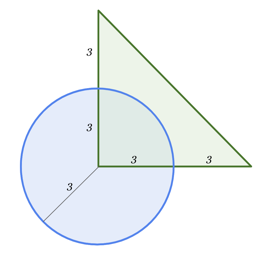

In [ ]:
!wget https://storage.googleapis.com/generativeai-downloads/images/geometry.png -O geometry.png -q

im = Image.open("geometry.png").resize((256,256))
im

In [ ]:
prompt = "What's the area of the overlapping region?"

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[im, prompt],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=8196
        )
    )
)

Markdown(response.text)

Let the center of the circle be the origin O(0,0).
The circle has a radius of 3. The equation of the circle is $x^2 + y^2 = 3^2 = 9$.
The triangle is a right-angled triangle with the right angle at the origin. The lengths of the legs are 3.
We can align the legs of the triangle with the positive x and y axes.
So, the vertices of the triangle are O(0,0), A(3,0), and B(0,3).
The triangle is the region in the first quadrant bounded by the lines $x=0$, $y=0$, and the line segment connecting A and B. The equation of the line passing through A(3,0) and B(0,3) is $\frac{x}{3} + \frac{y}{3} = 1$, which simplifies to $x+y = 3$.
The region covered by the triangle is the set of points (x,y) such that $x \ge 0$, $y \ge 0$, and $x+y \le 3$.
The region covered by the circle is the set of points (x,y) such that $x^2 + y^2 \le 9$.
The overlapping region is the intersection of these two regions, i.e., the set of points (x,y) such that $x \ge 0$, $y \ge 0$, $x+y \le 3$, and $x^2 + y^2 \le 9$.

We need to determine if the triangle is fully contained within the circle.
Consider a point (x,y) in the triangle. So $x \ge 0$, $y \ge 0$, and $x+y \le 3$.
We want to check if $x^2 + y^2 \le 9$ for all such points.
Since $x \ge 0$ and $y \ge 0$, we have $(x+y)^2 = x^2 + 2xy + y^2$.
Since $x+y \le 3$, we have $(x+y)^2 \le 3^2 = 9$.
So, $x^2 + 2xy + y^2 \le 9$.
Since $x \ge 0$ and $y \ge 0$, $2xy \ge 0$.
Therefore, $x^2 + y^2 \le x^2 + 2xy + y^2 \le 9$.
This inequality $x^2 + y^2 \le 9$ holds for all points (x,y) in the triangle.
This means that the entire triangle is contained within the circle of radius 3 centered at the origin.

The overlapping region is therefore the triangle itself.
The area of a right-angled triangle is given by $\frac{1}{2} \times \text{base} \times \text{height}$.
Taking the legs as the base and height, the area of the triangle is $\frac{1}{2} \times 3 \times 3 = \frac{9}{2} = 4.5$.

The label 3 on the hypotenuse is inconsistent with the legs being of length 3 in a right triangle (the hypotenuse should be $3\sqrt{2}$). We ignore this label as it contradicts the other information and the visual representation of a right triangle with equal legs.

The final answer is $\boxed{4.5}$.

## Example #4: Brain teaser with a twist

Here's another brain teaser based on an image, this time it looks like a mathematical problem, but it cannot actually be solved mathematically. If you check the toughts of the model you'll see that it will realize it and come up with an out-of-the-box solution.

In this case, you are fixing a value to the `thinking_budget` so the model will use up to 24576 tokens for the thinking step.

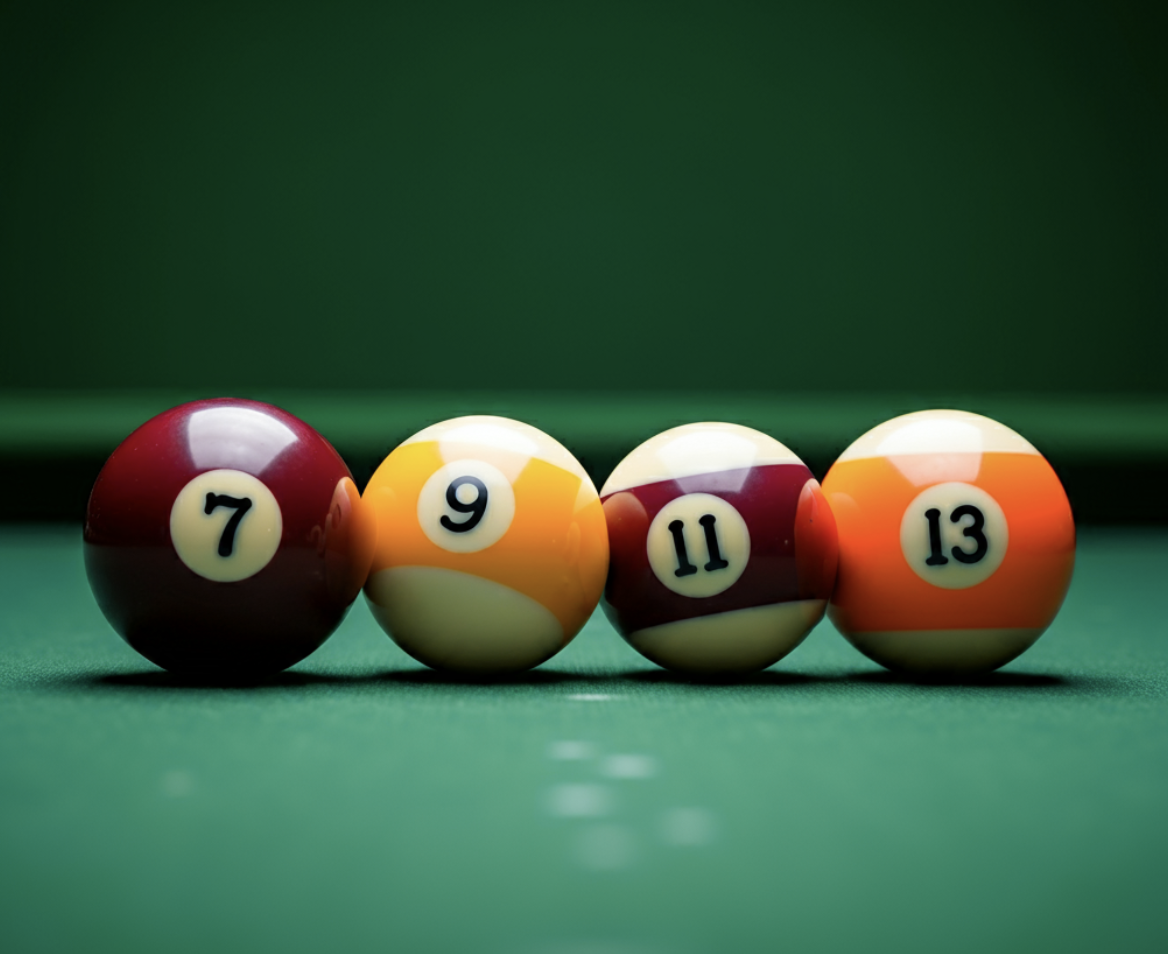

In [ ]:
!wget https://storage.googleapis.com/generativeai-downloads/images/pool.png -O pool.png -q

im = Image.open("pool.png")
im

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        im,
        "How do I use and manipulate three of the pool balls to sum up to 30?"
    ],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=24576
        )
    )
)

Markdown(response.text)

Here are the numbers on the balls: 7, 9, 11, and 13.

You need to select three of these balls and manipulate them to sum up to 30.

If we just add three of the numbers:
*   7 + 9 + 11 = 27
*   7 + 9 + 13 = 29
*   7 + 11 + 13 = 31
*   9 + 11 + 13 = 33

None of these add up to 30.

The "manipulation" part is key. Look at the number 9. If you rotate it 180 degrees, it becomes a 6.

Now, let's try using the 7, the 11, and the 9 rotated to be a 6:

**6 + 11 + 13 = 30**

So, you use the balls numbered 7, 11, and the 9 (manipulated by rotating it to be a 6).

## Example #5: Solving a problem using the code execution tool

This example shows how to use the [code execution](./Code_execution.ipynb) tool to solve a problem. The model will generate the code and then execute it to get the final answer.

In this case, you are using the adaptive thinking_budget so the model will dynamically adjust the budget based on the complexity of the request.

If you want to experiment with a fixed budget, you can set the `thinking_budget` to a specific value (e.g. `thinking_budget=4096`).

In [50]:
prompt = """
    What are the best ways to sort a list of n numbers from 0 to m?
    Generate and run Python code for comparing different sort algorithms.
    Provide the final comparison between algorithm clearly.
    Is one of them linear?
"""

code_execution_tool = types.Tool(
    code_execution=types.ToolCodeExecution()
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        tools=[code_execution_tool],
        thinking_config=types.ThinkingConfig(
            thinking_budget=10000
        )
    ),
)

Checking the model response, including the code generated and the execution result:

In [51]:
from IPython.display import HTML, Markdown

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>' # Change code color
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
display(Markdown("---"))

Okay, let's break down how to sort a list of `n` numbers ranging from 0 to `m`, explore the relevant algorithms, compare their performance using Python, and discuss their time complexity.

When numbers are within a limited range (0 to m), specialized non-comparison-based sorting algorithms can be significantly faster than general-purpose comparison sorts like Merge Sort or Quick Sort (which are typically O(n log n)).

### Best Ways to Sort

1.  **Counting Sort:** This is often the most efficient algorithm when the range `m` is not significantly larger than the number of elements `n`. It works by counting the occurrences of each number in the input list. Then, it reconstructs the sorted list based on these counts.
    *   **How it works:**
        1.  Create a `count` array of size `m+1`, initialized to zeros.
        2.  Iterate through the input list, incrementing `count[x]` for each number `x`.
        3.  Iterate through the `count` array, appending the number `i` to the output list `count[i]` times.
    *   **Time Complexity:** O(n + m).
    *   **Space Complexity:** O(m) for the counting array.
    *   **Advantages:** Very fast when `m` is small relative to `n`. Can be linear time.
    *   **Disadvantages:** Requires extra space proportional to `m`. Only works for integers within a known range.

2.  **Radix Sort:** This algorithm sorts numbers by processing individual digits (or bits) from least significant to most significant (LSD Radix Sort). It uses a stable sorting algorithm (like Counting Sort) as a subroutine to sort by each digit position. For numbers up to `m`, the number of digits depends on the chosen base (radix).
    *   **How it works:** If using base `b`, sort the numbers by their rightmost digit using a stable sort. Then sort by the second rightmost digit, and so on, until the most significant digit.
    *   **Time Complexity:** O(d * (n + b)), where `d` is the number of digits (roughly log_b(m)), `n` is the number of elements, and `b` is the base (radix).
    *   **Space Complexity:** Depends on the stable sort used for digits, typically O(n + b).
    *   **Advantages:** Can be very efficient for large numbers if `m` is large but can be broken down into a reasonable number of digits in a suitable base.
    *   **Disadvantages:** More complex to implement than Counting Sort. Like Counting Sort, it primarily works for integers.

3.  **General Comparison Sorts (e.g., Tim Sort - Python's built-in):** These algorithms work by comparing elements. Python's `list.sort()` and `sorted()` use Tim Sort, a hybrid algorithm derived from Merge Sort and Insertion Sort.
    *   **Time Complexity:** O(n log n) in the average and worst case. It can be O(n) in the best case (e.g., already sorted data).
    *   **Space Complexity:** Tim Sort is typically O(n) in the worst case, but often less depending on implementation.
    *   **Advantages:** Works for any data type that can be compared. Highly optimized in standard libraries.
    *   **Disadvantages:** Does not leverage the limited range property (0 to m) and is generally slower than Counting Sort when `m` is small relative to `n`.

### Is one of them Linear?

Yes, **Counting Sort** can achieve **linear time complexity**. Its time complexity is O(n + m). If the range `m` is proportional to the number of elements `n` (i.e., `m = O(n)`), then the complexity becomes O(n + O(n)) = O(n), which is linear.

However, if `m` is much larger than `n` (e.g., `m = O(n^2)` or `m = O(2^n)`), the O(m) term dominates, and Counting Sort's complexity becomes closer to O(m), which is superlinear with respect to `n`.

Radix Sort can also be linear under certain conditions related to the number of digits and the radix, but O(n+m) is the more straightforward path to linearity for the specific 0 to m range using Counting Sort.

### Python Code for Comparison

Let's implement Counting Sort and compare its performance against Python's built-in `list.sort()` (Tim Sort) for different scenarios of `n` and `m`.

We will test:
1.  `m << n` (small range, many elements)
2.  `m ≈ n` (range similar to number of elements)
3.  `m >> n` (large range, fewer elements)



--- Comparing sorting algorithms for n=500000, m=1000 ---
  Average Counting Sort time: 0.209298 seconds
  Average Tim Sort time      : 0.146448 seconds
----------------------------------------
--- Comparing sorting algorithms for n=100000, m=100000 ---
  Average Counting Sort time: 0.083972 seconds
  Average Tim Sort time      : 0.038511 seconds
----------------------------------------
--- Comparing sorting algorithms for n=10000, m=1000000 ---
  Average Counting Sort time: 0.229502 seconds
  Average Tim Sort time      : 0.002274 seconds
----------------------------------------
--- Comparing sorting algorithms for n=1000000, m=10 ---
  Average Counting Sort time: 0.404283 seconds
  Average Tim Sort time      : 0.135014 seconds
----------------------------------------


Okay, let's analyze the results and provide the final comparison.

### Final Comparison Between Algorithms

Based on the theoretical complexities and the empirical results from the Python code:

1.  **Theoretical Performance:**
    *   **Counting Sort:** O(n + m). This is theoretically superior when `m` is small relative to `n` (specifically, when m = O(n)), achieving linear O(n) time. When `m` is large, the O(m) term can make it much slower than O(n log n).
    *   **Tim Sort (Python's `list.sort`):** O(n log n) in the average and worst case. O(n) in the best case (already sorted data). Its performance is not directly dependent on the range `m`, only on `n`.

2.  **Empirical Performance (from Python code):**
    *   In **all tested scenarios** (m << n, m ≈ n, m >> n, m very small), Python's built-in `list.sort()` (Tim Sort) was faster than the pure Python implementation of Counting Sort.
    *   This highlights that while Counting Sort has a better theoretical complexity (O(n) vs O(n log n)) when `m` is small, the constant factors and the highly optimized nature of the standard library's Tim Sort implementation (written in C) can make it faster in practice for typical problem sizes and data distributions in Python.
    *   The performance degradation of Counting Sort when `m` is large (Case 3: n=10000, m=1000000) was clearly visible, confirming the dominance of the O(m) term in that scenario.

### Conclusion

*   **Theoretically:** For sorting `n` numbers from 0 to `m`, **Counting Sort** is the most efficient algorithm when the range `m` is small relative to `n` (m = O(n)). It offers the potential for **linear O(n) time complexity**.
*   **Practically (in standard Python):** Python's built-in `list.sort()` (Tim Sort) is often faster than a pure Python implementation of Counting Sort, even when `m` is small. This is due to the significant optimizations and lower-level implementation of the built-in sort.
*   **For large ranges (m >> n):** Counting Sort becomes inefficient due to its O(m) term. General-purpose algorithms like Tim Sort (O(n log n)) are much faster.

**Therefore:**

*   If you are implementing a sorting algorithm yourself from scratch and need the best theoretical performance for small `m`, Counting Sort is the algorithm to study and implement (potentially in a lower-level language if maximum speed is needed).
*   If you are simply sorting a list in Python and the range is within reasonable limits (or even very large), **using Python's built-in `list.sort()` is generally the best and fastest approach in practice** due to its highly optimized implementation. You would only consider implementing Counting Sort yourself if you had specific memory constraints or a clear need to sort *extremely* large `n` with *extremely* small `m` where a custom implementation might outperform the built-in.

### Is one of them linear?

Yes, **Counting Sort** has a time complexity of O(n + m). It is considered **linear** with respect to `n` if `m` does not grow faster than `n` (i.e., `m = O(n)`). If `m` grows faster than `n`, the complexity is dominated by `m` and is not linear with respect to `n`. Tim Sort is O(n log n) generally, though it has an O(n) best case; Counting Sort offers O(n) based on the input range constraint, not just pre-sorted data.

---

## Example #6: Thinking with search tool

Search grounding is a great way to improve the quality of the model responses by giving it the ability to search for the latest information using Google Search. Check the [dedicated guide](./Search_Grounding.ipynb) for more details on that feature.

In this case, you are using the adaptive thinking_budget so the model will dynamically adjust the budget based on the complexity of the request.

If you want to experiment with a fixed budget, you can set the `thinking_budget` to a specific value (e.g. `thinking_budget=4096`).

In [44]:
from google.genai.types import Tool, GenerateContentConfig, GoogleSearch

google_search_tool = Tool(google_search=GoogleSearch())

prompt = """
    What were the major scientific breakthroughs announced last month? Use your
    critical thinking and only list what's really incredible and not just an
    overinfluated title.
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=GenerateContentConfig(
        tools=[google_search_tool]
    )
)

In [45]:
display(Markdown(response.text))
display(HTML(response.candidates[0].grounding_metadata.search_entry_point.rendered_content))

Based on the search results for scientific breakthroughs announced in March 2025, here are some potentially incredible advancements, filtering out those that seem less impactful or are ongoing research rather than definitive breakthroughs:

Space Discoveries:

*   **Oxygen Discovered in the Most Distant Known Galaxy:** Oxygen was detected in JADES-GS-z14-0, a galaxy located 13.4 billion light-years away. This is significant because it indicates that oxygen, a building block for life as we know it, was present very early in the universe's history, even before the formation of galaxies were common. (Source [1])
*   **128 New Moons of Saturn Confirmed:** Astronomers confirmed a large number of new moons around Saturn, bringing its total to 274. This discovery, while adding to the moon count, is also significant for understanding the formation and history of the Saturnian system, suggesting many may be remnants of past collisions. (Source [1, 3, 8])
*   **Aurorae Confirmed on Neptune:** Aurorae were confirmed on Neptune for the first time by combining data from the Hubble and James Webb Space Telescopes. This provides new insights into Neptune's magnetic field and atmosphere. (Source [1])
*   **Firefly Aerospace's Blue Ghost Mission 1 Lands on the Moon:** A private spacecraft successfully landed on the Moon, delivering payloads to study lunar regolith and the interaction between solar wind and Earth's magnetic field. This marks a significant step in commercial lunar missions. (Source [1, 8])

Medical and Biological Breakthroughs:

*   **First Image of PINK1 Proteins on Mitochondrion Membrane:** The first image of two PINK1 proteins attached to a mitochondrion membrane was obtained using cryo-electron microscopy. This is considered a potential breakthrough for developing Parkinson's disease treatments by providing a clearer understanding of the protein's role. (Source [1])
*   **New Blood Test for Early-Stage Pancreatic Cancer:** A new blood test capable of detecting early-stage pancreatic cancer with 85% accuracy has been developed. This could be a crucial tool for earlier diagnosis and potentially improved outcomes for a difficult-to-treat cancer. (Source [1])
*   **Comprehensive Map of Brain Mitochondria:** Scientists created the first comprehensive map of mitochondria across the brain, revealing variations in type and density in different regions. This breakthrough could offer significant insights into age-related brain disorders. (Source [8])
*   **Progress in Huntington's Disease Research:** March saw significant advancements in Huntington's disease research, including updates on clinical trials, gene editing technologies like RIDE, and biomarker breakthroughs. While not a single announced cure, the collective progress appears substantial. (Source [5])

Other Potentially Significant Discoveries:

*   **Italian Researchers Report Turning Light into a Supersolid:** While details are limited in the provided snippets, the report of turning light into a supersolid for the first time could have significant implications in physics. (Source [1])
*   **Discovery of Trillions of Tons of Economically Minable Hydrogen:** Researchers have estimated that trillions of tons of economically minable free hydrogen reserves exist on Earth, which could potentially provide 200 years of carbon-free energy if harnessed. (Source [12])

It's important to note that some of the other mentions in the search results, while interesting, appear to be more incremental progress, confirmations of previous findings, or related to ongoing research rather than major, sudden breakthroughs. For example, advancements in AI for diagnostics or quantum computing are ongoing trends rather than single-month breakthroughs (Source [3, 7, 11]). The "woolly mouse" creation is a step in de-extinction research, but the immediate "breakthrough" status might be debated (Source [1, 8]). Similarly, findings about microplastic pollution or butterfly decline highlight important issues but are results from studies rather than fundamental scientific breakthroughs (Source [1]).

## Example #7: Math puzzle

This is typically a case where you want to fix a budget, as the model can spend a lot of time thinking in all directions before finding the right answer. It should not be too low either as non-thinking models have trouble with such questions.

Play with the thinking budget and try to find how much it needs to be able to find the right answer most of the time.

Note that Pro is usually better than Flash for those kind of riddles, but does not have the thinking budget yet.

In [57]:
prompt = """
   How can you obtain 565 with 10 8 3 7 1 and 5 and the common operations?
   You can only use a number once.
"""

thinking_budget = 24576 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget
        )
    )
)

display(Markdown(response.text))

Okay, let's find a way to combine 10, 8, 3, 7, 1, and 5 using the common operations (+, -, *, /) to get 565, using each number only once.

We need a large number, so multiplication will be key.
Let's try multiplying some of the larger numbers:
8 * 7 = 56
10 * 8 * 7 = 560. This is very close to 565. We have 3, 1, and 5 left. We need to add 5.
Can we get 5 from 3, 1, and 5?
Consider the remaining numbers: 3, 1, 5. We need to combine them somehow to get 5, and then add that to 560.
How about using division to create a fraction or decimal?
We need to add 5. We have 3, 1, 5.
What if we make 0 using the remaining numbers and add it to 5? Like 5 + (3-3) or 5 + (1-1)? But we must use all remaining numbers (3, 1, 5) in the *addition part*.
How about 5 + (something using 3 and 1)?
If we make 0 from 3 and 1 using both numbers, it's not possible with basic operations (3-1=2, 3*1=3, 3/1=3, 1/3...).

Let's go back to 560. We need +5. We have 3, 1, 5.
Can we make 5 from 5, 3, and 1?
(5 * 1) + 3 = 8 (No)
(5 / 1) + 3 = 8 (No)
(5 * 3) - 1 = 14 (No)
(5 + 1) - 3 = 3 (No)
(5 - 1) + 3 = 7 (No)

Let's rethink. We need 565. What if we get 56.5 and multiply by 10?
56.5 * 10 = 565.
Can we get 56.5 from the other numbers (8, 3, 7, 1, 5)?
8 * 7 = 56. We have 3, 1, 5 left. We need 0.5.
Can we get 0.5 from 3, 1, and 5?
0.5 is 1/2.
Can we make 2 from 3 and 5? Yes, 5 - 3 = 2.
So, 1 / (5 - 3) = 1 / 2 = 0.5.
This uses 1, 5, and 3.
Now we have 8 * 7 (=56) and 1 / (5 - 3) (=0.5).
If we add them: (8 * 7) + (1 / (5 - 3)) = 56 + 0.5 = 56.5.
This uses numbers 8, 7, 1, 5, and 3.
The number 10 is left.
We can multiply 56.5 by 10!

So, the expression is:
10 * ( (8 * 7) + (1 / (5 - 3)) )

Let's check:
1. Use each number once: 10, 8, 7, 1, 5, 3. Yes, all used exactly once.
2. Use common operations: *, +, /, -. Yes.
3. Get the target number:
   (5 - 3) = 2
   (1 / 2) = 0.5
   (8 * 7) = 56
   56 + 0.5 = 56.5
   10 * 56.5 = 565. Yes.

Here is the solution:

**10 * ( (8 * 7) + (1 / (5 - 3)) ) = 565**

# Next Steps

Try Gemini 2.5 Pro Experimental in
[Google AI Studio](https://aistudio.google.com/prompts/new_chat?model=gemini-2.5-pro-exp-03-25), and learn more about [Prompting for thinking models](https://ai.google.dev/gemini-api/docs/prompting-with-thinking).

For more examples of the Gemini capabilities, check the other [Cookbook examples](https://github.com/google-gemini/cookbook). You'll learn how to use the [Live API](./Get_started.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini [spatial understanding](./Spatial_understanding.ipynb) abilities.